В прошлый раз рассмотрели, как решается гамильтонинан системы из двух частиц при помощи численных методов. Давайте пойдем дальше и попытаемся описать в принципе любое вещество. Оно также состоит из атомов, а они соответсвенно из положительно заряженных ядер и электронов. Гамильтонинан такой системы написать не представляет сложности:

$H = \sum_i p^2_i / 2m + \sum_j p^2_j / 2M + \sum_{i,j} \frac{Z^2e^2} {|\vec{R_i} - \vec{R_j}|} - \sum_{i,j} \frac{Ze^2} {|\vec{r_i} - \vec{R_j}|} + \sum_{i,j} \frac{e^2} {|\vec{r_i} - \vec{r_j}|}$

Давайте оценим для скольки частиц мы хотим решить такой гамильтониан. Пусть будет 1$см^3$ вещества, сколько там примерно электронов? 

Для металла порядка $10^{23}$. Таким образом наша волновая функция будем зависеть от $3  * 10 ^ {23} $ переменных.

А линейный размер матрицы для сетки предположим с шагом 0.01см: M = ${100}^{3 * 10^{23}} ={(10^6)}^{10^{23}}$.
Если каждое элемент матрицы содержит 8 битное число, то столько же M байтов нужно для хранения такой матрицы. 

Используем симметрию большинства твердых тел. Не нужно считать $1см^3$, нужно гораздо меньше, буквально объем содержащий уникальную периодическую комбинацию атомов. Если вещество состоит из одного атома, то достаточно разрешить гамильтонинан для одного атома.

Например, возьмем атом с Z = 4 электронами, сетку в 10 элементов (всего лишь). Тогда M = ${{(10^3)}^{4}} = 10^{12}$. Необходимо держать в памяти матрицу размером $M х M = M^2 = 10^{24}$ байт = $10^{12}$ Tб. Это мы еще не говорим про то, сколько времени будет такая матрица диагонализовываться.

В этом и заключается сложность с многочастичными системами, подходы "в лоб" здесь не работают. Точно такие *реальные* системы не решаются. 

Но хотим ли мы решить такую систему? Нужна ли нам ВФ описывающая движение каждой частицы? 

$\int |\psi(r,r_2,...,r_N)|^2  dr_2 dr_3 ...dr_{N} = |{\psi}(r)|^2 = \rho (r)$  

, где $\rho (r)$ - *электронная плотность*

Из-за того, что все "частицы" одинаковые, то $r$ - отвечает координате в среднем любой частицы в среднем поле дрyгих "частиц".

Бyдем считать средние значения, зная ВФ нашего состояния.

In [ ]:
import numpy as np

In [ ]:
a = 4
dx = 0.01
x = np.arange(-a, a, dx)

In [ ]:
psi = np.zeros((3, x.size))
psi[0] = np.exp(-x**2 / 2) 
psi[1] = np.exp(-x**2 / 2) * x
psi[2] = np.exp(-x**2 / 2) * (4*x**2 - 2)

In [ ]:
A = np.zeros(3)
for i in range(3):
  A[i] = np.sqrt(1. / np.sum(np.abs(psi[i])** 2 * dx))
  psi[i] *= A[i]

In [ ]:
import matplotlib.pyplot as plt

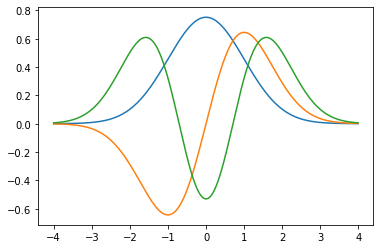

In [ ]:
for psii in psi:
  plt.plot(x, psii)

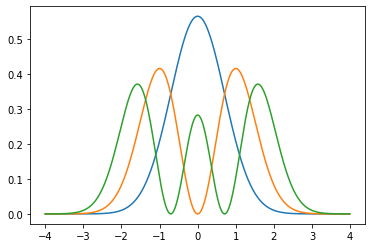

In [ ]:
for psii in psi:
  plt.plot(x, np.abs(psii)**2)

Потенциальная энергия $= \int \psi^*(x) \frac{x^2}{2} \psi(x) dx$

In [ ]:
pot = np.sum(psi[0] * x**2 / 2 * psi[0] * dx)

Кинетическая энергия $= \int \psi^*(x) (-\frac{d^2}{2dx^2}) \psi(x) dx$

In [ ]:
kin = -np.sum(psi[0] * np.gradient(np.gradient(psi[0])) * dx / 2 / dx**2)

In [ ]:
print(pot, kin)

0.2499998729562816 0.24998763485841538


In [ ]:
x_mean = np.sum(psi[0] * x * psi[0] * dx)
print(x_mean)

-2.5396468816829554e-09


In [ ]:
p_mean = np.sum(psi[0] * 1j * np.gradient(psi[0],1) / dx * dx)
print(p_mean)

2.5365108347052967e-09j


Посмотрим как действyют следyющие операторы:

$a = (x + ip) /\sqrt{2}$

$a^+ = (x - ip) /\sqrt{2}$

In [ ]:
np.sum(psi[1] * (x * psi[0] - np.gradient(psi[0]) / dx) * dx)  / np.sqrt(2) / np.sqrt(1)

0.9999872463994036

In [ ]:
np.sum(psi[1] * (x * psi[2] + np.gradient(psi[2]) / dx) * dx)  / np.sqrt(2) / np.sqrt(2)

0.9999789346267834

$aa^+  = (x + ip) (x - ip) /2 = x^2/2 + p^2/2$

In [ ]:
ph = (x * psi[0] - np.gradient(psi[0]) / dx) / np.sqrt(2)
phi = (x * ph - np.gradient(ph) / dx)/ np.sqrt(2) / np.sqrt(2)


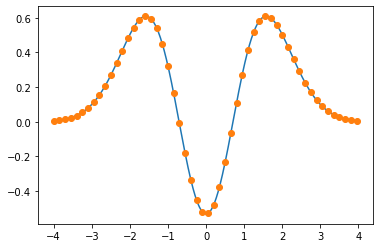

In [ ]:
plt.plot(x,phi)
plt.plot(x[::15], psi[2][::15], 'o')